In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\hp\\Desktop\\Classification_Project\\creditcard.csv')

In [67]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: >

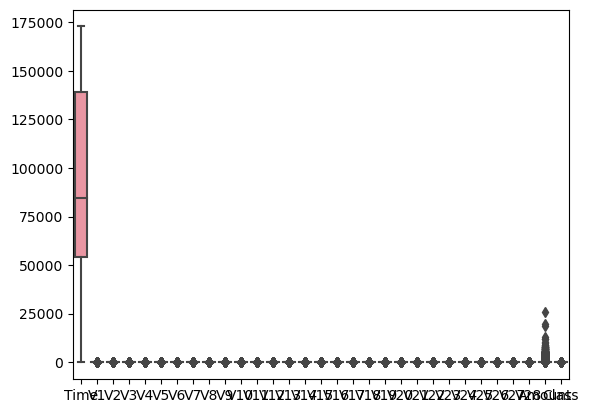

In [68]:
sns.boxplot(data = df, )

In [5]:
df.shape

(284807, 31)

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
X = df.drop('Class',axis = 1)
y = df['Class']

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Method 1: Cross Validation like KFold and Hyperparameter Tuning

In [16]:
log_model = LogisticRegression()
param_grid = {'C': 10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits = 5, shuffle = False, random_state=None)

In [17]:
grid_log_model = GridSearchCV(log_model, param_grid = param_grid,cv = cv,n_jobs = -1,scoring = 'f1_macro' )

In [18]:
grid_log_model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' pen

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [19]:
y_log_pred = grid_log_model.predict(X_test)

In [20]:
print(confusion_matrix(y_test,y_log_pred))
print(accuracy_score(y_test,y_log_pred))

[[85258    41]
 [   45    99]]
0.9989934810341398


In [22]:
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.71      0.69      0.70       144

    accuracy                           1.00     85443
   macro avg       0.85      0.84      0.85     85443
weighted avg       1.00      1.00      1.00     85443



### Decision Trees Work well with Imbalanced Dataset aswell

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_rf_pred = classifier.predict(X_test) 

In [28]:
print(confusion_matrix(y_test,y_rf_pred))
print(accuracy_score(y_test,y_rf_pred))
print(classification_report(y_test,y_rf_pred))

[[85289    10]
 [   31   113]]
0.9995201479348805
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.92      0.78      0.85       144

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [29]:
# Using Class weight

In [30]:
class_weight = {0:1,1:100}

In [32]:
classifier2 = RandomForestClassifier(class_weight = class_weight)
classifier2.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [33]:
y_rf_pred2 = classifier2.predict(X_test)

In [34]:
print(confusion_matrix(y_test,y_rf_pred2))
print(accuracy_score(y_test,y_rf_pred2))
print(classification_report(y_test,y_rf_pred2))

[[85293     6]
 [   30   114]]
0.9995786664794073
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.95      0.79      0.86       144

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



## Under Sampling

In [35]:
y_train.value_counts()

0    199016
1       348
Name: Class, dtype: int64

In [36]:
from imblearn.under_sampling import NearMiss

In [43]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns = NearMiss(sampling_strategy=0.8) 
# Reduce majority class such that minority class becomes 80 % of majority class
X_train_ns,y_train_ns = ns.fit_resample(X_train,y_train)
print('The number of classes before fit {}'.format(Counter(y_train)))
print('The number of classes after fit {}'.format(Counter(y_train_ns)))


The number of classes before fit Counter({0: 199016, 1: 348})
The number of classes after fit Counter({0: 435, 1: 348})


In [44]:
0.8*435


348.0

In [46]:
model = RandomForestClassifier()
model.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [48]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[76198  9101]
 [   10   134]]
0.893367508163337
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     85299
           1       0.01      0.93      0.03       144

    accuracy                           0.89     85443
   macro avg       0.51      0.91      0.49     85443
weighted avg       1.00      0.89      0.94     85443



## Over Sampling

In [49]:
from imblearn.over_sampling import RandomOverSampler

In [52]:
os = RandomOverSampler(sampling_strategy = 0.5)
# Increase the minority class such that it becomes 50% of majority class
X_train_ns,y_train_ns = os.fit_resample(X_train,y_train)
print('The number of classes before fit {}'.format(Counter(y_train)))
print('The number of classes after fit {}'.format(Counter(y_train_ns)))


The number of classes before fit Counter({0: 199016, 1: 348})
The number of classes after fit Counter({0: 199016, 1: 99508})


In [53]:
model2 = RandomForestClassifier()
model2.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [55]:
y_pred = model2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85293     6]
 [   28   116]]
0.999602073897218
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.95      0.81      0.87       144

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



### SMOTETomek

In [57]:
from imblearn.combine import SMOTETomek

In [60]:
from collections import Counter # finds value_counts
sm = SMOTETomek(sampling_strategy = 0.5)
# Create new points of minority class based on similar points, nearest neighbors
X_train_ns,y_train_ns = sm.fit_resample(X_train,y_train)
print('The number of classes before fit {}'.format(Counter(y_train)))
print('The number of classes after fit {}'.format(Counter(y_train_ns)))


The number of classes before fit Counter({0: 199016, 1: 348})
The number of classes after fit Counter({0: 198216, 1: 98708})


In [61]:
model3 = RandomForestClassifier()
model3.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [63]:
y_pred = model3.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85285    14]
 [   22   122]]
0.9995786664794073
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.90      0.85      0.87       144

    accuracy                           1.00     85443
   macro avg       0.95      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



### Ensemble Techniques

In [64]:
from imblearn.ensemble import EasyEnsembleClassifier

In [65]:
easy = EasyEnsembleClassifier()
easy.fit(X_train,y_train)

EasyEnsembleClassifier()

In [66]:
y_pred = easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[82018  3281]
 [   10   134]]
0.9614830939924862
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85299
           1       0.04      0.93      0.08       144

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443

